# Import Libraries

In [1]:
import sys

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn import model_selection
from sklearn.metrics import classification_report

In [5]:
from utilities import visualize_classifier

# Load Input Data

In [6]:
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels

In [7]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data

C:\Users\aashi\AppData\Local\Temp\ipykernel_16460\2758217787.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


Text(0.5, 1.0, 'Input data')

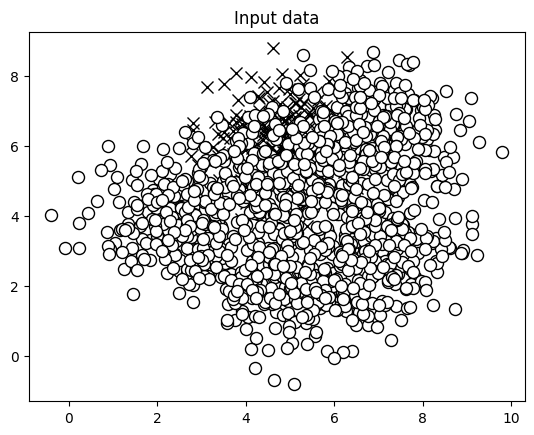

In [8]:
plt.figure()
plt.scatter(
      class_0[:, 0]
    , class_0[:, 1]
    , s=75
    , facecolors='black'
    , edgecolors='black'
    , linewidth=1
    , marker='x'
)
plt.scatter(
      class_1[:, 0]
    , class_1[:, 1]
    , s=75
    , facecolors='white'
    , edgecolors='black'
    , linewidth=1
    , marker='o'
)
plt.title('Input data')

# Split data into training and testing datasets 

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=5
)

# Extremely Random Forests classifier

In [12]:
# params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
# if len(sys.argv) > 1:
#     if sys.argv[1] == 'balance':
#         params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
#     else:
#         raise TypeError("Invalid input argument; should be 'balance'")

TypeError: Invalid input argument; should be balance

In [13]:
# Set this variable to True if you want to use class balancing
use_balance = True  # Change to True to use class_weight='balanced'

params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
if use_balance:
    params['class_weight'] = 'balanced'
print(params)

{'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}


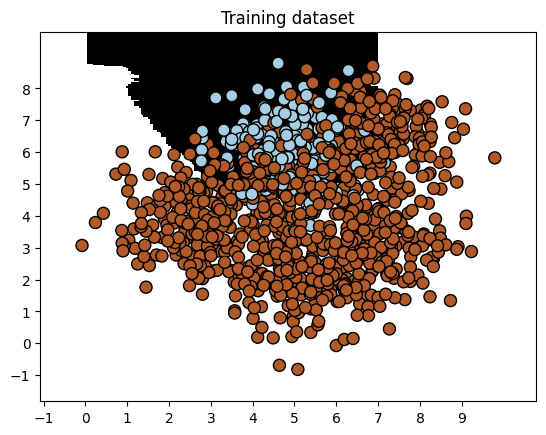

In [14]:
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

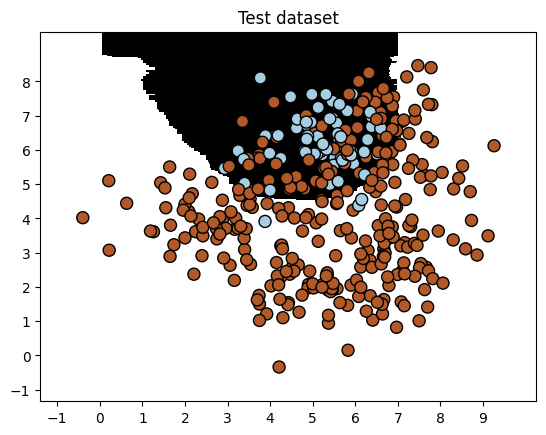

In [15]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance

In [16]:
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.44      0.93      0.60       181
     Class-1       0.98      0.77      0.86       944

    accuracy                           0.80      1125
   macro avg       0.71      0.85      0.73      1125
weighted avg       0.89      0.80      0.82      1125

########################################



In [17]:
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375

########################################

